In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv(
    "https://raw.githubusercontent.com/Ramil-cyber/Research_Linking_Analyzing_US_Prisons_Deaths/refs/heads/main/Data/Last_merged_full_df.csv"
)

# 2. Inspect basic structure (optional)
print(df.info())
print(
    df[
        [
            "state_name",
            "death_year",
            "total_prisoners_rate",
            "prison_death_rate",
            "male_prison_pop",
            "female_prison_pop",
            "total_prison_pop",
            "death_count",
        ]
    ].head()
)

# 3. Filter to the latest available year
latest_year = df["death_year"].max()
df_latest = df[df["death_year"] == latest_year]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_name                247 non-null    object 
 1   death_year                247 non-null    int64  
 2   death_count               247 non-null    int64  
 3   state_abbr                247 non-null    object 
 4   total_pop_15to64          247 non-null    int64  
 5   female_pop_15to64         247 non-null    int64  
 6   male_pop_15to64           247 non-null    int64  
 7   aapi_pct                  247 non-null    float64
 8   black_pct                 247 non-null    float64
 9   latinx_pct                247 non-null    float64
 10  native_pct                247 non-null    float64
 11  white_pct                 247 non-null    float64
 12  total_incarceration       247 non-null    int64  
 13  total_incarceration_rate  247 non-null    int64  
 14  total_pris

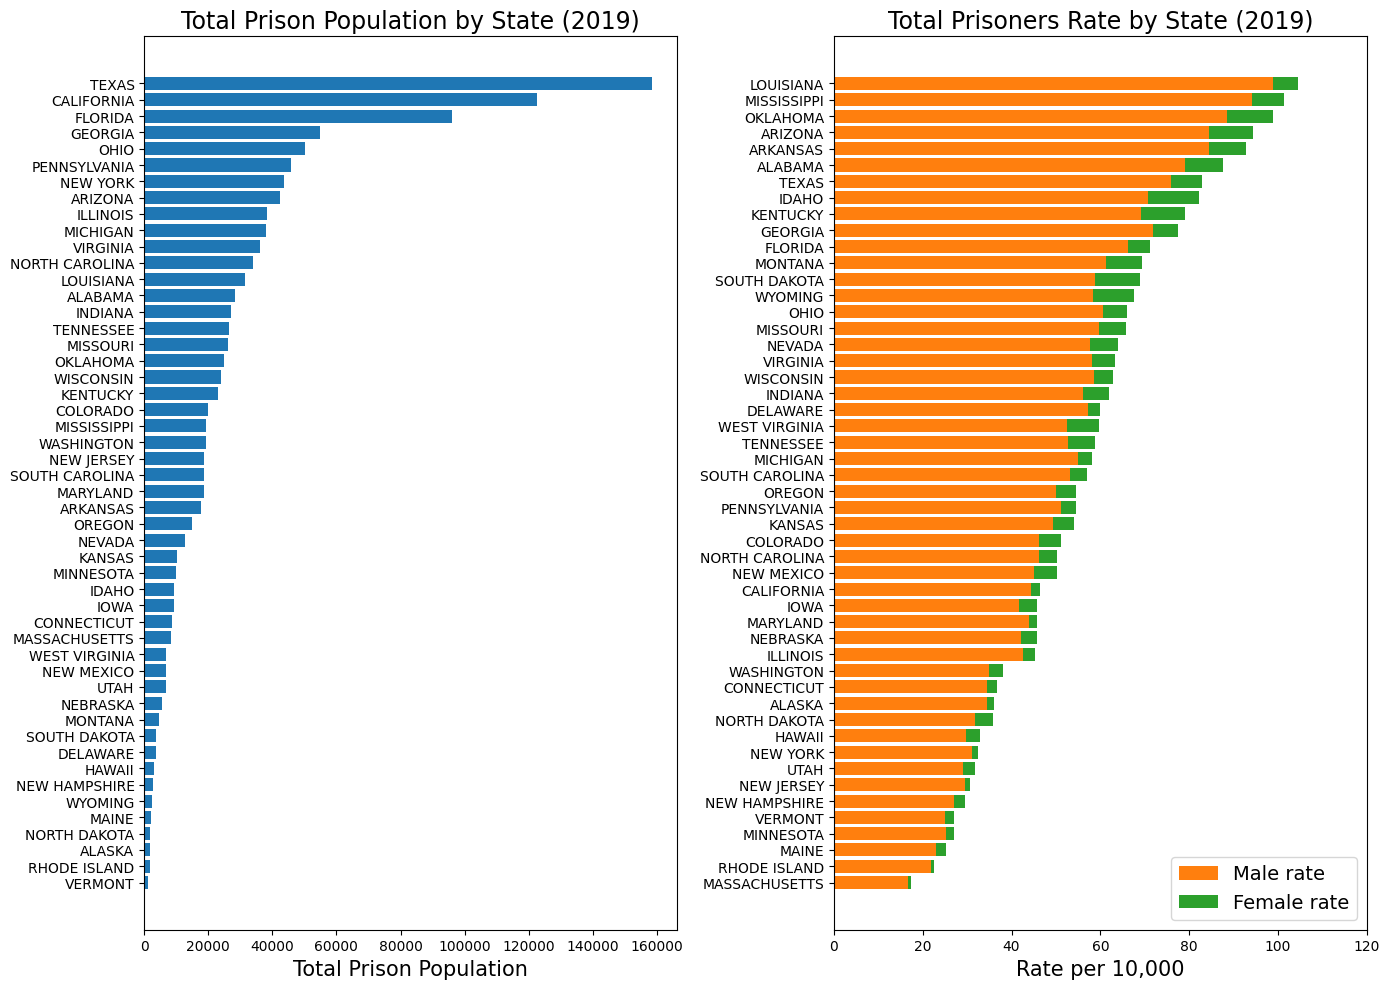

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

latest_year = df["death_year"].max()
df_latest = df[df["death_year"] == latest_year].copy()

# ——— Compute gender‐specific prison rates per 10 000 of 15–64 pop ———
df_latest["male_rate_15to64"] = (
    df_latest["male_prison_pop"] / df_latest["total_pop_15to64"]
) * 10000
df_latest["female_rate_15to64"] = (
    df_latest["female_prison_pop"] / df_latest["total_pop_15to64"]
) * 10000

# ——— Sort for each panel ———
# Panel 1: by total prison pop
df_pop = df_latest.sort_values("total_prison_pop", ascending=False)

# Panel 2: by combined gender rate so largest stacks sit at top
df_gender = df_latest.copy()
df_gender["combined_rate"] = (
    df_gender["male_rate_15to64"] + df_gender["female_rate_15to64"]
)
df_gender = df_gender.sort_values("combined_rate", ascending=False)

states = df_gender["state_name"]
male_rt = df_gender["male_rate_15to64"]
fem_rt = df_gender["female_rate_15to64"]

# ——— Plot ———
fig, axes = plt.subplots(1, 2, figsize=(14, 10), sharey=False)

# 1) Total Prison Population
axes[0].barh(df_pop["state_name"], df_pop["total_prison_pop"], color="tab:blue")
axes[0].invert_yaxis()
axes[0].set_title(f"Total Prison Population by State ({latest_year})", fontsize=17)
axes[0].set_xlabel("Total Prison Population", fontsize=15)
axes[0].tick_params(axis="y", labelsize=10)  # state names
axes[0].tick_params(axis="x", labelsize=10)

# 2) Stacked male/female prison rates per 10 000 (15–64 pop)
axes[1].barh(states, male_rt, label="Male rate", color="tab:orange")
axes[1].barh(states, fem_rt, left=male_rt, label="Female rate", color="tab:green")
axes[1].invert_yaxis()
axes[1].set_title(f"Total Prisoners Rate by State ({latest_year})", fontsize=17)
axes[1].set_xlabel("Rate per 10,000", fontsize=15)
axes[1].tick_params(axis="y", labelsize=10)
axes[1].tick_params(axis="x", labelsize=10)
axes[1].legend(fontsize=14, loc="lower right")  # legend font size

# 3) Customize x‐axis ticks to 0,20,40,… up to the top of the data
max_rate = np.ceil((male_rt + fem_rt).max() / 20) * 20
axes[1].set_xticks(np.arange(0, max_rate + 1, 20))

plt.tight_layout()
plt.show()

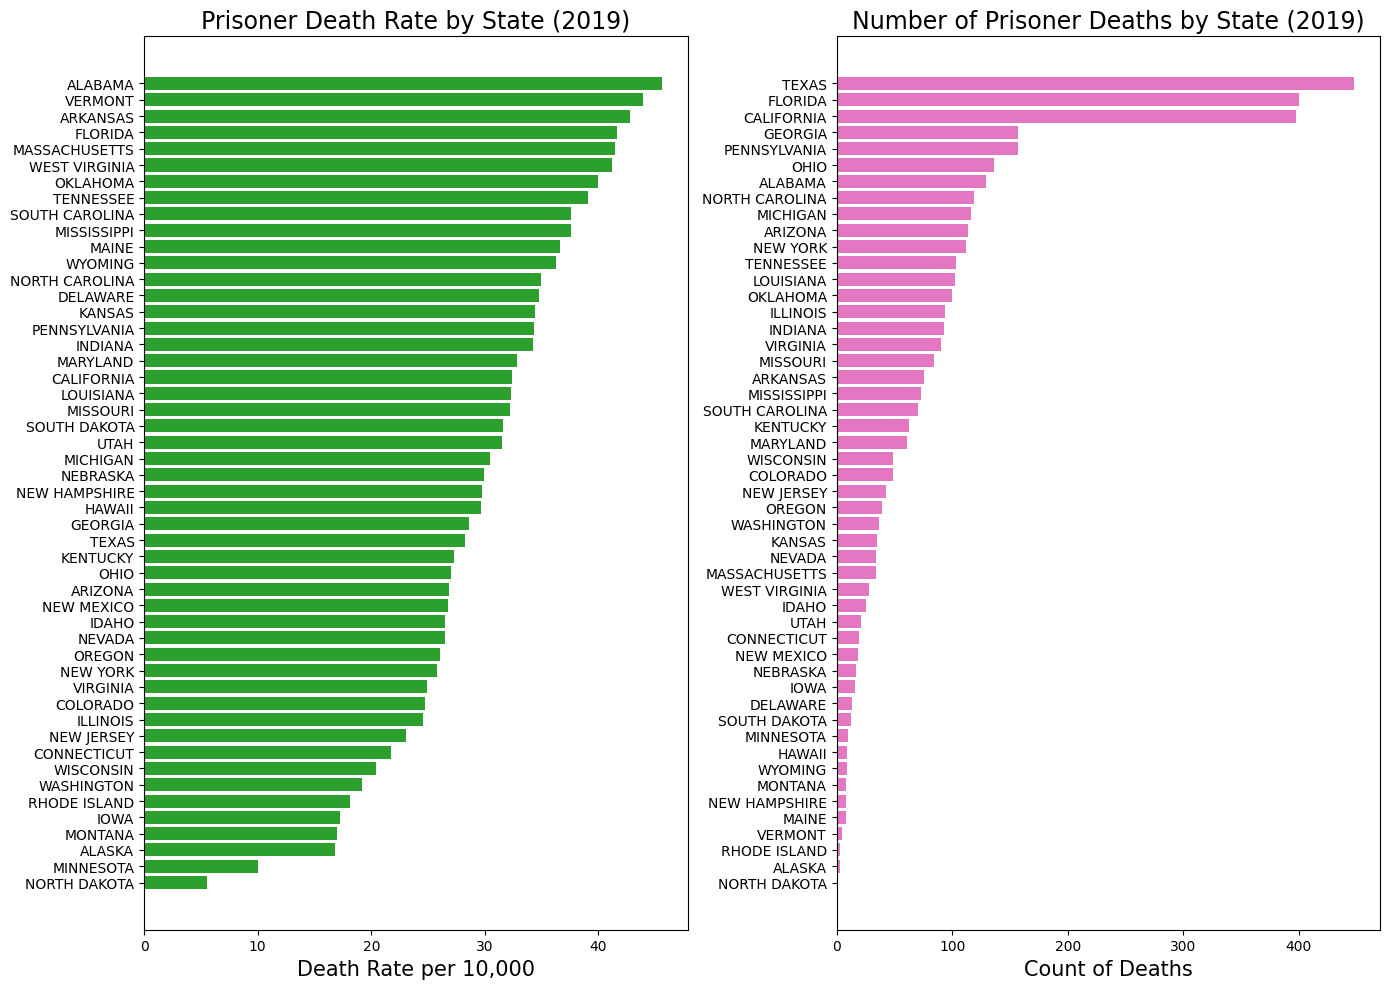

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

latest_year = df["death_year"].max()
df_latest = df[df["death_year"] == latest_year].copy()

# 2. Prepare sorted DataFrames
#    a) Death rate
df_rate = df_latest[["state_name", "prison_death_rate"]].sort_values(
    "prison_death_rate", ascending=False
)
#    b) Death count
df_count = df_latest[["state_name", "death_count"]].sort_values(
    "death_count", ascending=False
)

# 3. Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# 3a) Prisoner Death Rate
axes[0].barh(df_rate["state_name"], df_rate["prison_death_rate"], color="tab:green")
axes[0].invert_yaxis()  # largest at top
axes[0].set_title(f"Prisoner Death Rate by State ({latest_year})", fontsize=17)
axes[0].set_xlabel("Death Rate per 10,000", fontsize=15)
axes[0].tick_params(axis="y", labelsize=10)  # state names
axes[0].tick_params(axis="x", labelsize=10)

# 3b) Number of Prisoner Deaths
axes[1].barh(df_count["state_name"], df_count["death_count"], color="tab:pink")
axes[1].invert_yaxis()
axes[1].set_title(f"Number of Prisoner Deaths by State ({latest_year})", fontsize=17)
axes[1].set_xlabel("Count of Deaths", fontsize=15)
axes[0].tick_params(axis="y", labelsize=10)  # state names
axes[0].tick_params(axis="x", labelsize=10)

plt.tight_layout()
plt.show()